# **LUMAKANG, TUAZON, VIRTUDEZ - BCS34**
Enabling Activity 3:
This activity covers pixel representation, color models (RGB, HSV), image interpolation
methods, and geometric transformations (scaling, rotation, and translation). It is based on
practical coding tasks and analysis using OpenCV and matplotlib libraries.
Objective:
The students will learn:
How images are represented at the pixel level (RGB and HSV color models).
The eHect of interpolation techniques on image scaling and rotation.
How to apply geometric transformations like scaling, rotation, and translation to images.
Prerequisites:
Basic Python programming.
Libraries: opencv-python, numpy, matplotlib.
Setup:
Before starting, the following Python libraries should be installed:
pip install opencv-python numpy matplotlib
Activity Overview:
The activity will be split into four tasks:
1. Task 1: Pixel Representation and Color Models (RGB & HSV)
2. Task 2: Image Interpolation Methods
3. Task 3: Geometric Transformations - Scaling, Rotation, Translation
4. Task 4: Combine the concepts to perform image manipulation


In [ ]:
pip install opencv-python numpy matplotlib

# TASK 1 **Pixel Representation and Color Models (RGB & HSV)**

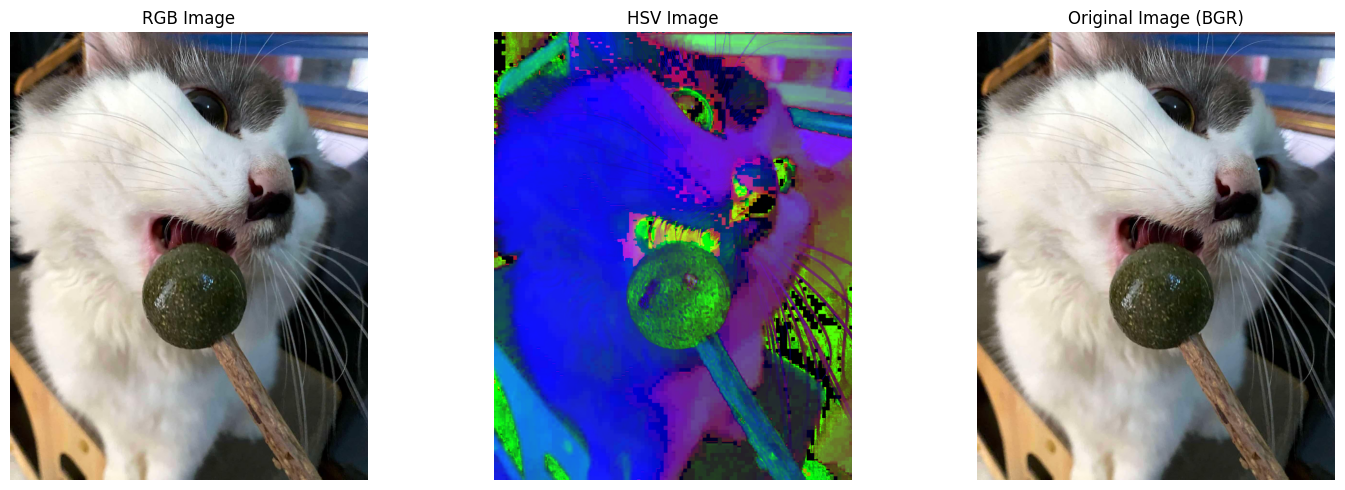

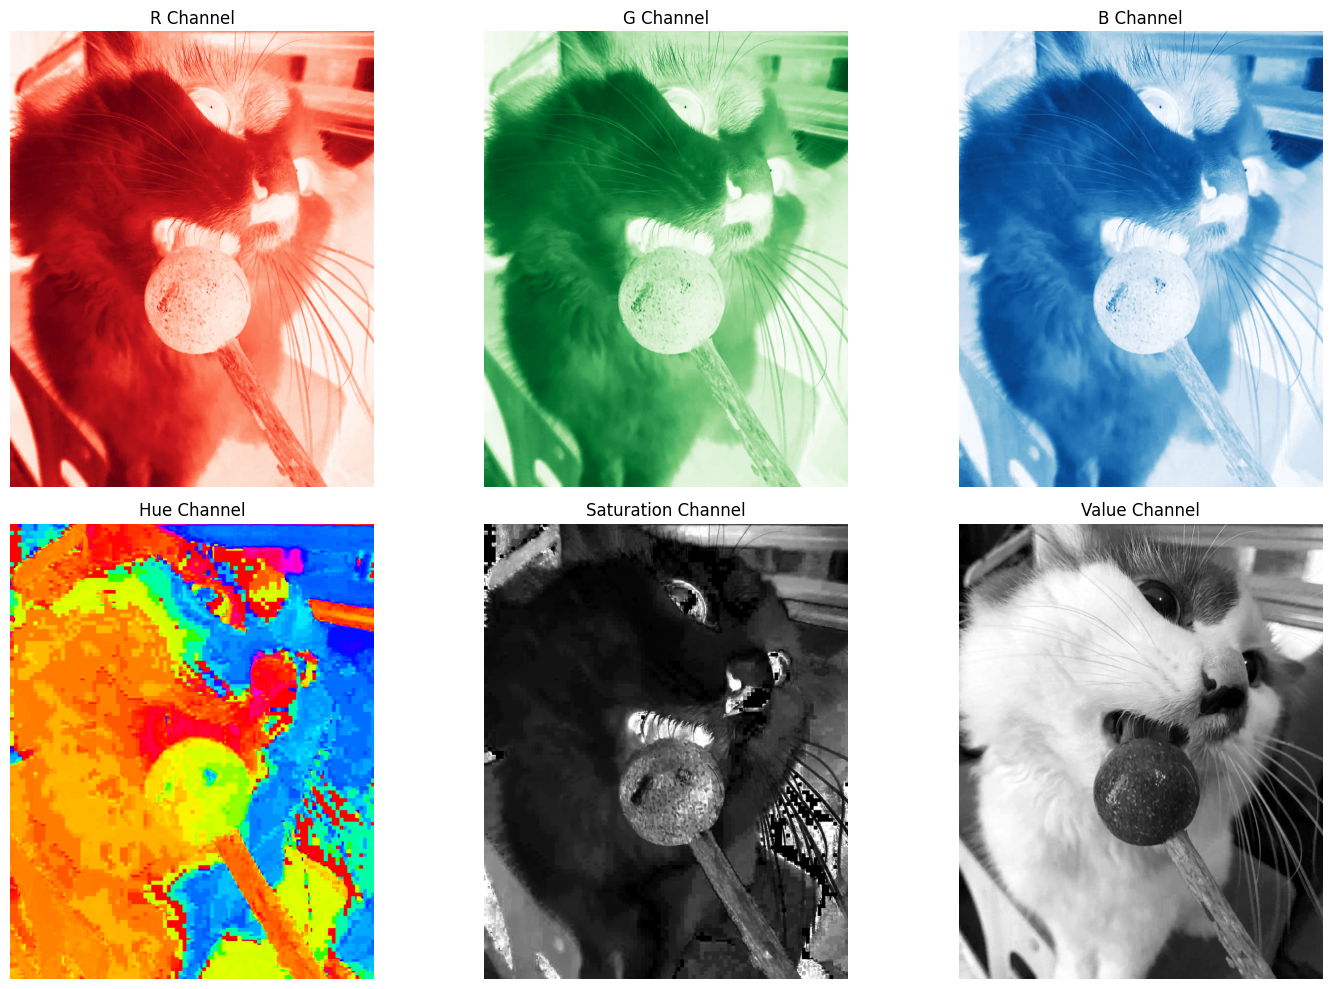

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('image.png')

# Convert the image to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plot original, RGB, and HSV images
plt.figure(figsize=(15, 5))

# Show RGB image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')
plt.axis('off')

# Show HSV image
plt.subplot(1, 3, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')
plt.axis('off')

# Show original image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.title('Original Image (BGR)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Let's examine individual color channels
plt.figure(figsize=(15, 10))

# RGB Channels
plt.subplot(2, 3, 1)
plt.imshow(image_rgb[:,:,0], cmap='Reds')
plt.title('R Channel')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(image_rgb[:,:,1], cmap='Greens')
plt.title('G Channel')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(image_rgb[:,:,2], cmap='Blues')
plt.title('B Channel')
plt.axis('off')

# HSV Channels
plt.subplot(2, 3, 4)
plt.imshow(image_hsv[:,:,0], cmap='hsv')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(image_hsv[:,:,1], cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(image_hsv[:,:,2], cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

observations:


1. Why does OpenCV load images in BGR format instead of RGB?
2. What are the advantages of using the HSV color model over RGB for certain image processing tasks?
3. Which color channel in the HSV model controls the brightness of the image?

conclusions:

1. OpenCV loads images in BGR format because OpenCV was originally developed for use with Intel’s image processing library, which adopted BGR as the standard. This convention was maintained for compatibility and performance reasons, even though RGB is more common in other contexts (like web development).

2. The HSV model separates chromatic content (Hue) from intensity (Value), making it easier to manipulate colors based on their hue (color) while preserving lightness or brightness. This separation is useful for tasks like color-based segmentation, image thresholding, and lighting-invariant recognition, which are difficult to achieve with the RGB model.

3. The Value channel in HSV controls the brightness of the image. It represents the intensity of the color, with 0 being completely dark and 255 being fully bright.

# TASK 2 **Image Interpolation Methods**

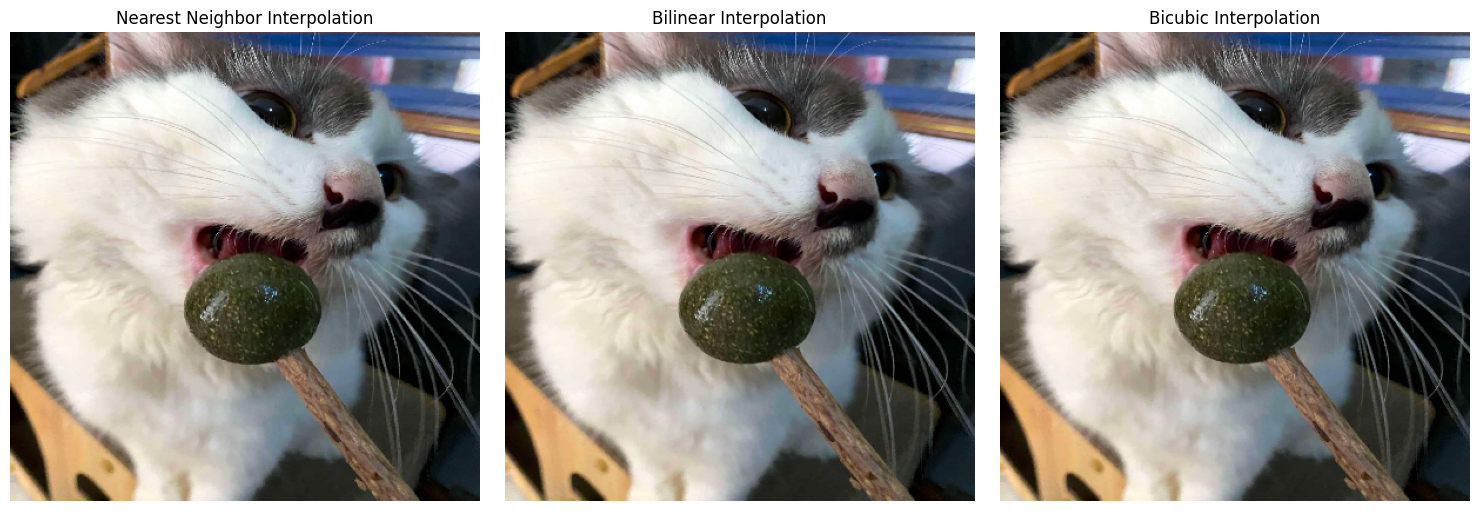

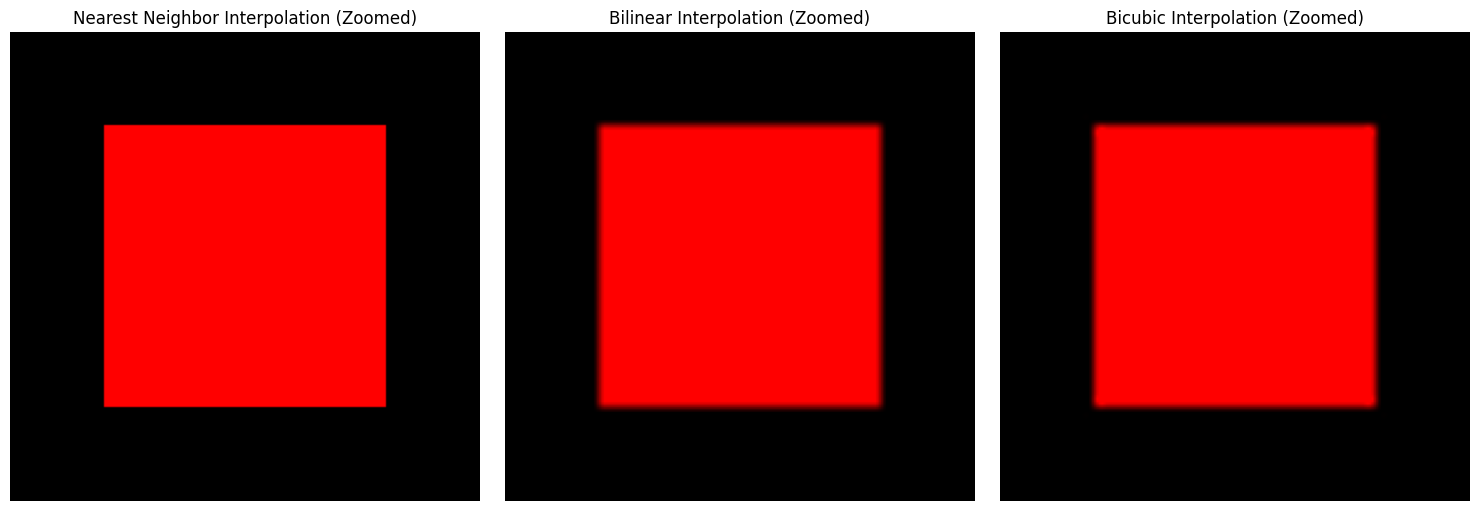

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('image.png')


# Task 2: Image Interpolation Methods
# Objective: Explore different image interpolation methods for resizing and scaling.

# Resizing Image with Different Interpolation Methods
methods = {
    "Nearest Neighbor": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC
}

# Size for scaling
new_size = (400, 400)

plt.figure(figsize=(15, 5))
for idx, (method_name, method) in enumerate(methods.items(), start=1):
    resized_image = cv2.resize(image, new_size, interpolation=method)

    # Plot each resized image
    plt.subplot(1, 3, idx)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{method_name} Interpolation")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Additional visualization to better see the differences
# Create a small sample with clear edges
sample = np.zeros((50, 50, 3), dtype=np.uint8)
sample[10:40, 10:40] = [0, 0, 255]  # Red square

# Apply different interpolation methods with significant upscaling
plt.figure(figsize=(15, 5))
for idx, (method_name, method) in enumerate(methods.items(), start=1):
    upscaled = cv2.resize(sample, (200, 200), interpolation=method)

    plt.subplot(1, 3, idx)
    plt.imshow(cv2.cvtColor(upscaled, cv2.COLOR_BGR2RGB))
    plt.title(f"{method_name} Interpolation (Zoomed)")
    plt.axis('off')

plt.tight_layout()
plt.show()


# TASK 3 **Geometric Transformations (Scaling, Rotation, Translation)**

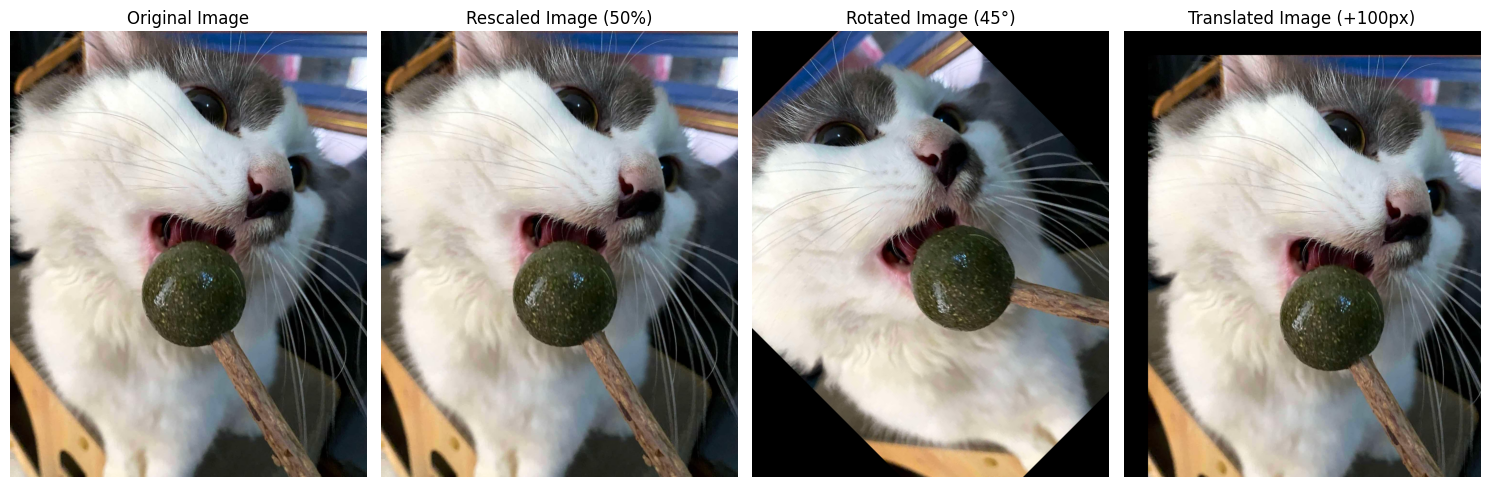

In [ ]:
# Task 3: Geometric Transformations (Scaling, Rotation, Translation)
# Objective: Apply geometric transformations on images.

# Scaling: Apply scaling transformation (50% size)
scale_percent = 50  # Scale down by 50%
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
rescaled_image = cv2.resize(image, dim)

# Rotation: Rotate the image by 45 degrees
center = (image.shape[1] // 2, image.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # Rotate by 45 degrees
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# Translation: Move the image 100 pixels in both x and y direction
translation_matrix = np.float32([[1, 0, 100], [0, 1, 100]])  # Translate by (100, 100)
translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

# Plot the transformations
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display Rescaled image
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(rescaled_image, cv2.COLOR_BGR2RGB))
plt.title('Rescaled Image (50%)')
plt.axis('off')

# Display Rotated image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45°)')
plt.axis('off')

# Display Translated image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image (+100px)')
plt.axis('off')

plt.tight_layout()
plt.show()

# TASK 4 **Task 4: Combine Concepts**

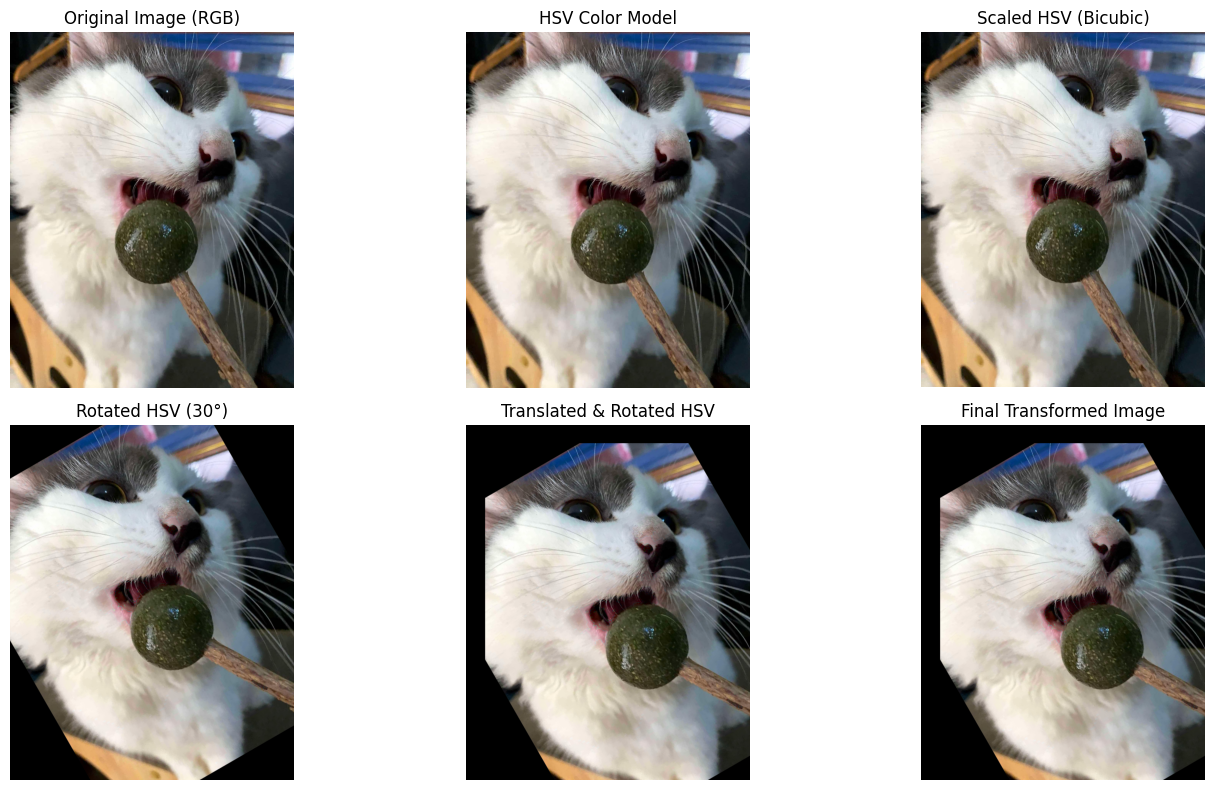

In [ ]:
# Task 4: Combine Concepts
# Objective: Combine the concepts of color models, interpolation, and transformations to manipulate an image.

# Convert the image to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Resize with Bicubic interpolation
scaled_hsv = cv2.resize(image_hsv, dim, interpolation=cv2.INTER_CUBIC)

# Create a rotation matrix for 30 degrees
rotation_matrix_30 = cv2.getRotationMatrix2D((scaled_hsv.shape[1] // 2, scaled_hsv.shape[0] // 2), 30, 1.0)

# Rotate the scaled image by 30 degrees
rotated_hsv = cv2.warpAffine(scaled_hsv, rotation_matrix_30, (scaled_hsv.shape[1], scaled_hsv.shape[0]))

# Create a translation matrix for 50 pixels in both directions
translation_matrix_50 = np.float32([[1, 0, 50], [0, 1, 50]])

# Translate the rotated image
translated_hsv = cv2.warpAffine(rotated_hsv, translation_matrix_50, (rotated_hsv.shape[1], rotated_hsv.shape[0]))

# Create a figure to display the transformation pipeline
plt.figure(figsize=(15, 8))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image (RGB)')
plt.axis('off')

# Display HSV image
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
plt.title('HSV Color Model')
plt.axis('off')

# Display scaled HSV image
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(scaled_hsv, cv2.COLOR_HSV2RGB))
plt.title('Scaled HSV (Bicubic)')
plt.axis('off')

# Display rotated HSV image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(rotated_hsv, cv2.COLOR_HSV2RGB))
plt.title('Rotated HSV (30°)')
plt.axis('off')

# Display translated & rotated HSV image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(translated_hsv, cv2.COLOR_HSV2RGB))
plt.title('Translated & Rotated HSV')
plt.axis('off')

# Display a combined view with annotations
plt.subplot(2, 3, 6)
final_image = cv2.cvtColor(translated_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(final_image)
plt.title('Final Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()



QUESTIONS:
- The image is conversion to the HSV color model.
- Bicubic interpolation in applying for resizing.
- The image is rotated and translated using the same geometric transformations.

ANSWERS:
1. The image was converted to the HSV color model using cv2.cvtColor() with the COLOR_BGR2HSV flag. This transformation separates the color information into three components: Hue, Saturation, and Value, which is useful for tasks like color-based segmentation and more intuitive manipulation of image properties such as brightness or color.

2. Bicubic interpolation, implemented with cv2.INTER_CUBIC, was used for resizing. This method provides smooth results by considering a 4x4 neighborhood of pixels to calculate the new pixel values during resizing. It generally produces better results than other methods, like bilinear interpolation, especially for enlarging images.

3. The image was rotated by 30 degrees using warpAffine with a rotation matrix created by getRotationMatrix2D. The rotation was followed by translation, shifting the image by 50 pixels in both the x and y directions. This was achieved by applying another warpAffine with a translation matrix, which allows for both rotation and translation in a single transformation step.








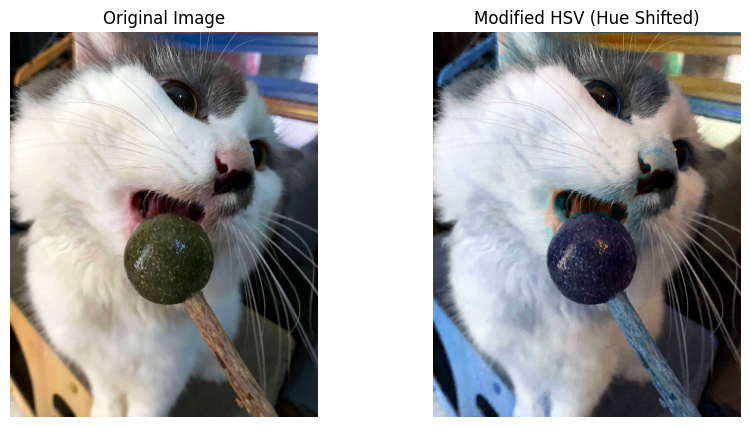

In [ ]:
#extra hsv for better viewing of visual difference

modified_hsv = image_hsv.copy()
modified_hsv[:,:,0] = (modified_hsv[:,:,0] + 90) % 180  # Shift hue by 90 degrees
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(modified_hsv, cv2.COLOR_HSV2RGB))
plt.title('Modified HSV (Hue Shifted)')
plt.axis('off')
plt.show()